In [10]:
# Import some general scientific python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import the parameterization model group object
from fooof import FOOOF,FOOOFGroup

# Import useful parameterization related utilities and plot functions
from fooof.bands import Bands
from fooof.analysis import get_band_peak_fg
from fooof.utils import trim_spectrum
from fooof.data import FOOOFSettings
from fooof.plts import plot_spectrum
from fooof.plts.periodic import plot_peak_fits, plot_peak_params
from fooof.plts.aperiodic import plot_aperiodic_params, plot_aperiodic_fits
from scipy.ndimage import uniform_filter1d
from fooof.plts.fg import plot_fg_peak_cens

# Import functions to examine frequency-by-frequency error of model fits
from fooof.analysis.error import compute_pointwise_error_fg

In [11]:
# Load csv files containing frequency and power values
freqs = np.ravel(pd.read_csv("frequencies.csv", header=None))                                                             
spectra_ad = pd.read_csv("psd_data_ad.csv", header=None)                                                           
spectra_cn = pd.read_csv("psd_data_cn.csv", header=None) 
spectra = np.array(pd.concat([spectra_ad, spectra_cn], ignore_index=True))

spectra_ad = np.array(spectra_ad)
spectra_cn = np.array(spectra_cn)

In [12]:
print(freqs.shape)
print(spectra.shape)

(103,)
(1235, 103)


In [13]:
# Get the number of subjects
n_subjs = spectra_cn.shape[0]
print('There are {:d} subjects.'.format(n_subjs))

There are 551 subjects.


In [14]:
# Set random seed
np.random.seed(1)

In [45]:
# Define settings for subsampling a selection of power spectra
subsample_frac = 1 
n_sample = int(n_subjs * subsample_frac)

# Select a random selection of spectra to explore
select = np.random.choice(n_subjs, int(n_subjs * subsample_frac), replace=False)
spectra_subsample = spectra_cn[select, :]

In [46]:
# Define `peak_width_limit` for each model
m1_peak_width = [1, 12]
m2_peak_width = [1, 12]
# Define `max_n_peaks` for each model
m1_n_peaks = 1
m2_n_peaks = 5 

# Define `min_peak_height` for each model
m1_peak_height = 0.01
m2_peak_height = 0.01

# Define 'peak_threshold' for each model
m1_peak_threshold = 1
m2_peak_threshold = 1 


In [47]:
# Define frequency range for each model
m1_PSD_range = [0.01, 15]
m2_PSD_range = [2, 45]

# Sub-select frequency ranges
m1_freq, m1_spectra = trim_spectrum(freqs, spectra_subsample, m1_PSD_range)
m2_freq, m2_spectra = trim_spectrum(freqs, spectra_subsample, m2_PSD_range)

In [48]:
# Fit model object with model 1 settings
fg1 = FOOOFGroup(peak_width_limits=m1_peak_width, max_n_peaks=m1_n_peaks, min_peak_height=m1_peak_height, peak_threshold=m1_peak_threshold)
fg1.fit(m1_freq, m1_spectra)

# Create individual reports for model 1 settings
for ind in range(len(fg1)):
    temp_model = fg1.get_fooof(ind, regenerate=True)
    # temp_model.save_report(file_name='EOP_' + str(ind) + '_fm1_settings', file_path='output')

Running FOOOFGroup across 551 power spectra.


In [49]:
# Fit model object with model 2 settings
fg2 = FOOOFGroup(peak_width_limits=m2_peak_width, max_n_peaks=m2_n_peaks, min_peak_height=m2_peak_height, peak_threshold=m2_peak_threshold)
fg2.fit(m2_freq, m2_spectra)

# Create individual reports for model 2 settings
for ind in range(len(fg2)):
    temp_model = fg2.get_fooof(ind, regenerate=True)
    # temp_model.save_report(file_name='EOP_' + str(ind) + '_fm2_settings', file_path='output')

Running FOOOFGroup across 551 power spectra.


In [50]:
# Fit group PSD over the 2-20 Hz and 3-40 Hz ranges, respectively
fg1.fit(freqs, spectra_subsample, freq_range=m1_PSD_range)
fg2.fit(freqs, spectra_subsample, freq_range=m2_PSD_range)

Running FOOOFGroup across 551 power spectra.
Running FOOOFGroup across 551 power spectra.


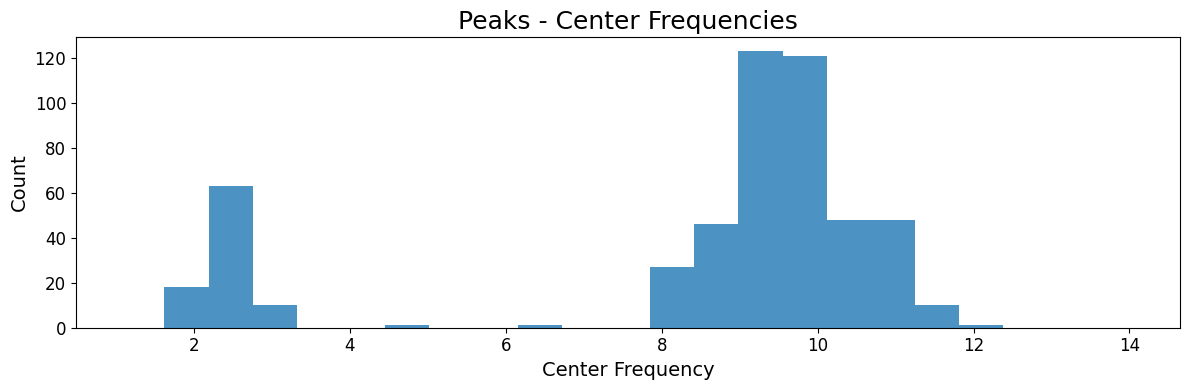

In [51]:
fig, ax = plt.subplots(1,1, figsize=(12,4))
plot_fg_peak_cens(fg1, ax)
fig.savefig("cn_peak.pdf", bbox_inches='tight')

In [37]:
# Print and save subset results and plots of fit parameters, for further examination
fg1.save_report(file_name='EOP_' + 'fg1_settings', file_path='output')
fg2.save_report(file_name='EOP_' + 'fg2_settings', file_path='output')

[0.07551312 0.05710087 0.19886516 0.18766201 0.08786309 0.04749977
 0.12962747 0.10796179 0.1169437  0.08551509 0.06205991 0.12397493
 0.03511383 0.15124165 0.08862315 0.10602538 0.05684955 0.12562562
 0.10473742 0.08571182 0.08364065 0.07802191 0.0606694  0.14916951
 0.10744352 0.06098045 0.07712636 0.09759912 0.037894   0.10734492
 0.08723026 0.03999986 0.08413634 0.18349257 0.10499861 0.171342
 0.09379956 0.08110275 0.23561549 0.08233527 0.10313853 0.06459771
 0.06136976 0.07723151 0.08743895 0.06165798 0.10492662 0.09459807
 0.10004036 0.06848007 0.08600069 0.04948371 0.08752123 0.04588024
 0.08851859 0.08554252 0.07322485 0.06028317 0.07140348 0.10721785
 0.10541104 0.08677907 0.09806218 0.10157984 0.08034604 0.08939164
 0.11560975 0.12146543 0.13913493 0.09427535 0.06322581 0.14729437
 0.08122605 0.13425398 0.10574732 0.08078618 0.09188196 0.06564684
 0.0897219  0.11502045 0.2051325  0.09381964 0.08467767 0.1355862
 0.04515614 0.09645162 0.0583667  0.04887864 0.09197572 0.1101169

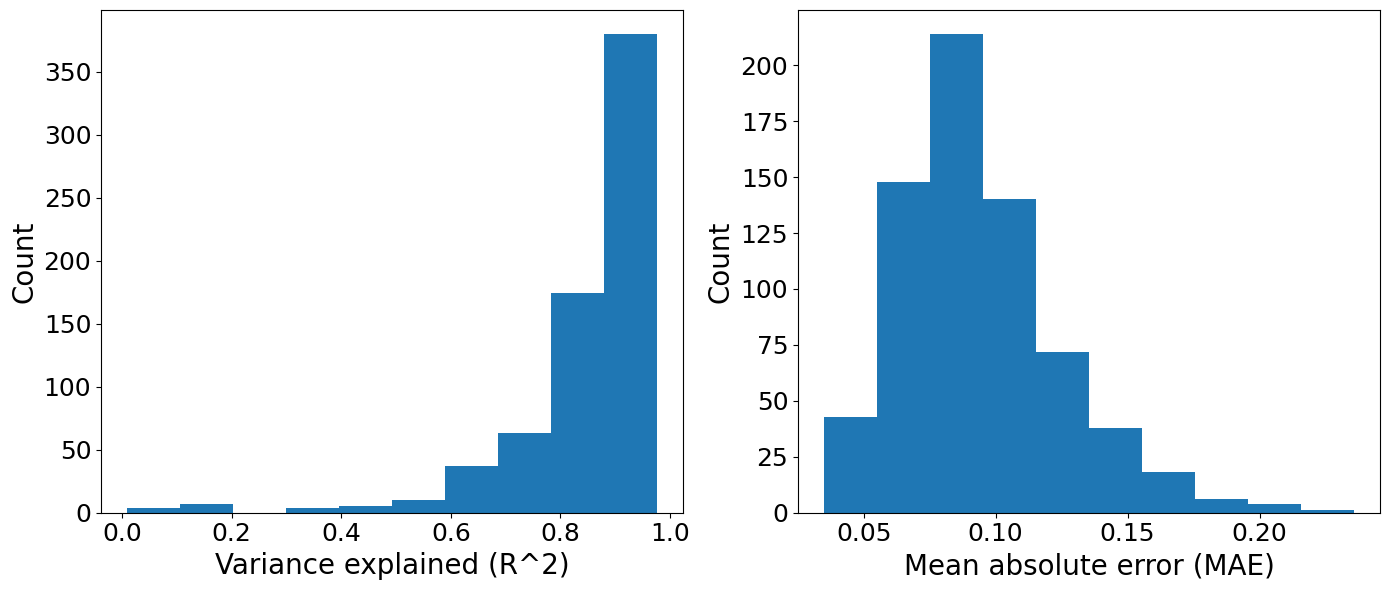

In [23]:
# Plot distributions of goodness of fit parameters
fig, (ax0,ax1) = plt.subplots(1, 2, figsize=(14,6))
err = fg1.get_params('error')
r2s = fg1.get_params('r_squared')
print(err)
ax0.hist(r2s)
ax0.set_xlabel('Variance explained (R^2)', fontsize=20)
ax0.set_ylabel('Count', size=20)
ax0.tick_params(labelsize=18)

ax1.hist(err)
ax1.set_xlabel('Mean absolute error (MAE)', fontsize=20)
ax1.set_ylabel('Count', size=20)
ax1.tick_params(labelsize=18)

fig.tight_layout()
plt.show()

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 2 - 40 Hz                        
                                 Frequency Resolution is 0.49 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offset, exponent):                              
                                          1.1184, 0.8933                                          
                                                                                                  
                                       1 peaks were found:                                        
          

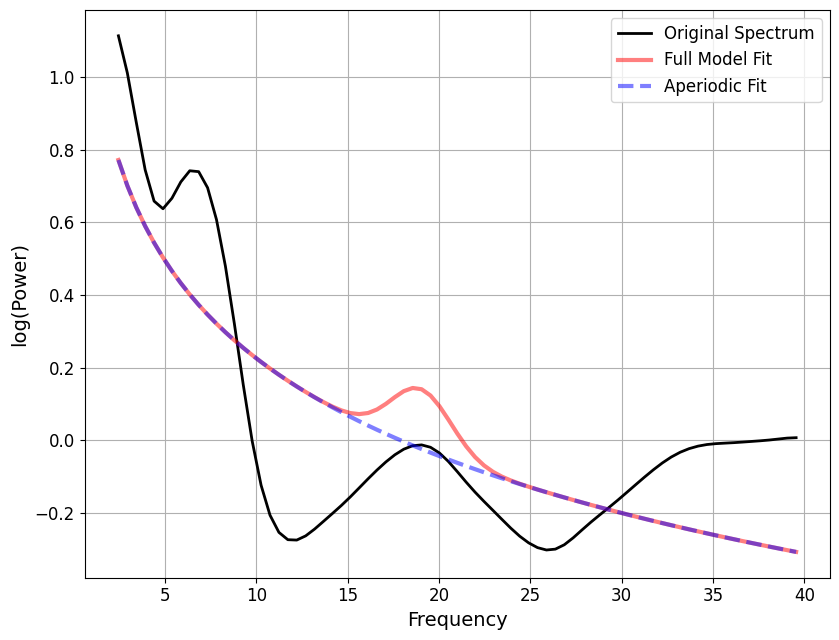

In [15]:
# Find the index of the worst model fit from the group
worst_fit_ind = np.argmax(fg2.get_params('error'))

# Extract this model fit from the group
fm = fg2.get_fooof(worst_fit_ind, regenerate=True)

# Check results and visualize the extracted model
fm.print_results()
fm.plot()

In [16]:
# Extract all fits that are above some error threshold, for further examination.
underfit_error_threshold = 0.100
underfit_check = []
for ind, res in enumerate(fg1):
    if res.error > underfit_error_threshold:
        underfit_check.append(fg1.get_fooof(ind, regenerate=True))
        
# Loop through the problem fits and save out reports, to check later.
for ind, fm in enumerate(underfit_check):
    # fm.plot()
    fm.save_report('EOP_UnderFit_ToCheck_#' + str(ind), file_path='output/underfit')

c:\Users\Hi\AppData\Local\Programs\Python\Python311\Lib\site-packages\fooof\core\reports.py:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(fpath(file_path, fname(file_name, SAVE_FORMAT)))
c:\Users\Hi\AppData\Local\Programs\Python\Python311\Lib\site-packages\fooof\core\reports.py:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(fpath(file_path, fname(file_name, SAVE_FORMAT)))
c:\Users\Hi\AppData\Local\Programs\Python\Python311\Lib\site-packages\fooof\core\reports.py:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(fpath(file_path, fname(file_name, SAVE_FORMAT)))
c:\Users\Hi\AppData\Local\Programs\Python\Python311\Lib\site-packages\fooof\core\reports.py:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so res

In [17]:
# Extract all fits that are below some error threshold, for further examination.
overfit_error_threshold = 0.02
overfit_check = []
for ind, res in enumerate(fg2):
    if res.error < overfit_error_threshold:
        overfit_check.append(fg2.get_fooof(ind, regenerate=True))

# Loop through the problem fits and save out reports, to check later.
for ind, fm in enumerate(overfit_check):
    # fm.plot()
    fm.save_report('EOP_OverFit_ToCheck_#' + str(ind), file_path='output/overfit')

c:\Users\Hi\AppData\Local\Programs\Python\Python311\Lib\site-packages\fooof\core\reports.py:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(fpath(file_path, fname(file_name, SAVE_FORMAT)))
c:\Users\Hi\AppData\Local\Programs\Python\Python311\Lib\site-packages\fooof\core\reports.py:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(fpath(file_path, fname(file_name, SAVE_FORMAT)))
c:\Users\Hi\AppData\Local\Programs\Python\Python311\Lib\site-packages\fooof\core\reports.py:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(fpath(file_path, fname(file_name, SAVE_FORMAT)))
c:\Users\Hi\AppData\Local\Programs\Python\Python311\Lib\site-packages\fooof\core\reports.py:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so res

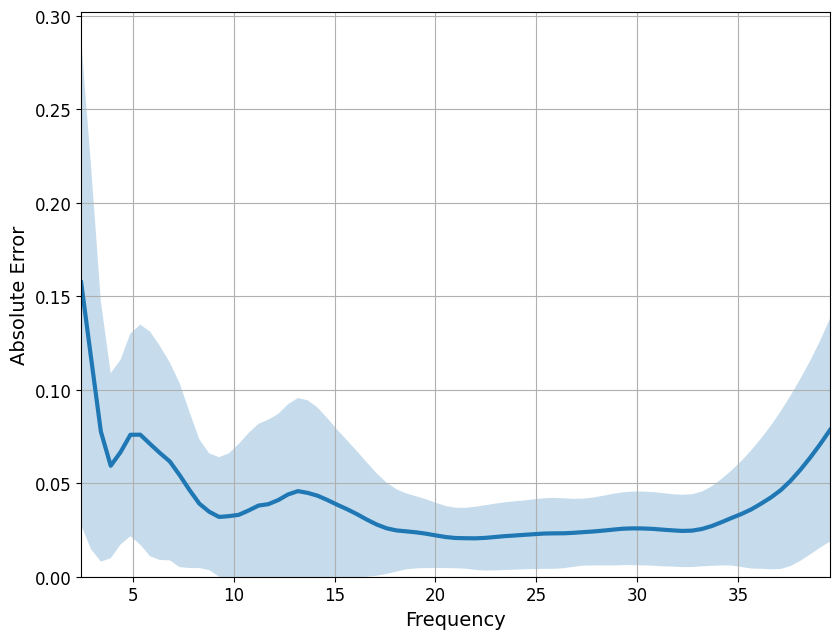

In [22]:
# Plot frequency-by-frequency error 
compute_pointwise_error_fg(fg2, plot_errors=True)

In [25]:
# Return the errors - this returns a 2D matrix of errors for all fits
errs_fg = compute_pointwise_error_fg(fg2, plot_errors=False, return_errors=True)

In [26]:
# Check which frequency has the highest error
f_max_err = fg2.freqs[np.argmax(np.mean(errs_fg, 0))]
print('Frequency with highest mean error: \t\t\t', f_max_err)

Frequency with highest mean error: 			 2.44140625


In [27]:
# Check which frequency has the largest standard deviation of error
f_max_std = fg2.freqs[np.argmax(np.std(errs_fg, 0))]
print('Frequency with highest standard deviation of error: \t', f_max_std)

Frequency with highest standard deviation of error: 	 2.44140625


In [ ]:
# Drop poor model fits based on MAE
fg1.drop(fg1.get_params('error') > 0.10)